파이썬코드로 이미지의 pca구하기 

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)


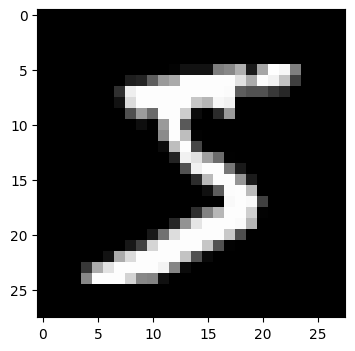

In [ ]:
import numpy as np
import scipy
import scipy.stats
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from ipywidgets import interact
import pandas as pd
#plt.style.use('fivethirtyeight')

MNIST = fetch_openml('mnist_784', version=1)
images = MNIST['data'].to_numpy().astype(np.double) / 255
print(images.shape)

plt.figure(figsize=(4,4))
plt.imshow(images[0].reshape(28,28), cmap='gray')
plt.grid(False)

데이터 분산1로 만들기기

차원수는  784개 28*28

1차원 배열 x,y,z는 3차원 

### 주성분 분석 알고리즘(PCA)

1. Data normalization
2. Covariance matrix 의 eigenvalue, eigenvector 계산    
3. Principal components 에 해당하는 각 벡터의 기저공간에 데이터 사영

평균0으로 만들기기

In [ ]:
# 1. Normalization

def normalize(X):
    N, D = X.shape
    mu = np.mean(X, axis=0)  # 평균값 계산
    X = X - mu  # 중심화
    return X, mu

images_=images[:10000]

N=images_.shape[0]
##데이터 중심화 적용

X_normalized, mean = normalize(images_)
##공분산 행렬 구하기
S = (X_normalized.T @ X_normalized) 


고유벡터 및 고유 값구하기기

In [ ]:
# 2. Covariance matrix 의 eigenvalue, eigenvector 계산

def eig(S):
    eig_vals, eig_vecs = np.linalg.eig(S)
    sort_indices = np.argsort(eig_vals)[::-1] # 내림차순 정렬
    return eig_vals[sort_indices], eig_vecs[:, sort_indices]
eig_vals, eig_vecs = eig(S)


In [ ]:
def eig(S):
    eig_vals, eig_vecs = np.linalg.eig(S)
    sort_indices = np.argsort(eig_vals)[::-1] # 내림차순 정렬
    return eig_vals[sort_indices], eig_vecs[:, sort_indices]

In [ ]:
images_.shape[0]

10000

전치행렬과 데이터 곱하기기

In [ ]:
# 3. Principal components 에 해당하는 각 벡터의 기저공간에 데이터 사영

def reconstruct(X, PC):
    return (X @ PC) @ PC.T # vector projection 

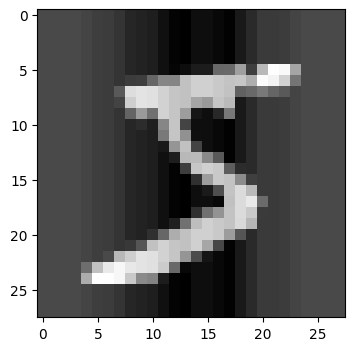

In [ ]:
def normalize(X):
    N, D = X.shape
    mu = np.mean(X, axis=0) ##데이터의 평균값
    Xbar = X - mu ##데이터 중심화
    return Xbar, mu 
# 1. Normalization
X_normalized, mean = normalize(images[0].reshape(28,28))

plt.figure(figsize=(4,4))
plt.imshow(X_normalized, cmap='gray')
plt.grid(False)

In [ ]:
import numpy as np

# 이미지를 불러옵니다.
image = images[0].reshape(28,28)

# 이미지를 열 방향으로 정규화합니다.
# axis=0은 세로 방향으로 정규화하겠다는 의미입니다.
image_normalized = (image - np.mean(image, axis=0)) / np.std(image, axis=0, ddof=1)

# 분산이 0인 부분은 그대로 두기 위해서 np.nan_to_num 함수를 사용합니다.
image_normalized = np.nan_to_num(image_normalized)

# 이미지의 분산을 확인합니다.
print(np.var(image_normalized, axis=0))

[0.         0.         0.         0.         0.96428571 0.96428571
 0.96428571 0.96428571 0.96428571 0.96428571 0.96428571 0.96428571
 0.96428571 0.96428571 0.96428571 0.96428571 0.96428571 0.96428571
 0.96428571 0.96428571 0.96428571 0.96428571 0.96428571 0.96428571
 0.         0.         0.         0.        ]


<ipython-input-23-3295121f1ec6>:8: RuntimeWarning: invalid value encountered in true_divide
  image_normalized = (image - np.mean(image, axis=0)) / np.std(image, axis=0, ddof=1)


In [ ]:
img = image_normalized


# 이미지를 numpy 배열로 변환합니다.
img_arr = np.array(img)

# 이미지의 분산을 계산합니다.
var = np.var(img_arr, axis=(0, 1))

# 분산 값을 출력합니다.
print(var)

0.6887755102040817


In [ ]:
def PCA_Avatar(images, num_components, num_data=4000):
    X = images[:num_data] # 4000개의 데이터만 사용
    N, D = X.shape # N은 데이터의 갯수 D는 데이터의 크기
    
    def normalize(X):
      mu = np.mean(X, axis=0)  # 평균값 계산
      X = X - mu  # 중심화
      return X ,mu
  
    X_normalized ,mean= normalize(X) # 중심화 적용

    
    S = (X_normalized.T @ X_normalized) / N # 공분산행렬구하기
    
    def eig(S):
      eig_vals, eig_vecs = np.linalg.eig(S) # 고유값 및 고유벡터 구하기
      sort_indices = np.argsort(eig_vals)[::-1] # 내림차순 정렬
      return eig_vals[sort_indices], eig_vecs[:, sort_indices] 
    eig_vals, eig_vecs = eig(S) # 고유값 구하기
  
    def reconstruct(X, PC):
      return (X @ PC) @ PC.T # 데이터 복원

    principal_vals= np.real(eig_vals[:num_components]) # 고유값 갯수 줄이기
    principal_components =np.real(eig_vecs[:,:num_components]) # 고유벡터 갯수 줄이기
    reconst_X = reconstruct(X_normalized, principal_components) + mean # 데이터복원
    
    #복원 데이터,분산 리턴
    return reconst_X, principal_vals

In [ ]:
_, Dispersion = PCA_Avatar(images, 784) # 분산을 가져오기
Dispersion=Dispersion/np.sum(Dispersion) # 분산을 100분률로 변경
cumsum = np.cumsum(Dispersion) # 분산 누적합을 구함
d= np.argmax(cumsum>=0.96)+1 ##데이터의 96%를 표현한 주성분갯수 
print("데이터의 96%를 표현한 주성분의 갯수는 =",d,'입니다.')

데이터의 96%를 표현한 주성분의 갯수는 = 171 입니다.


In [ ]:
count=np.array(10)

pca 구하기기

pca 데이터 압축 시각화화

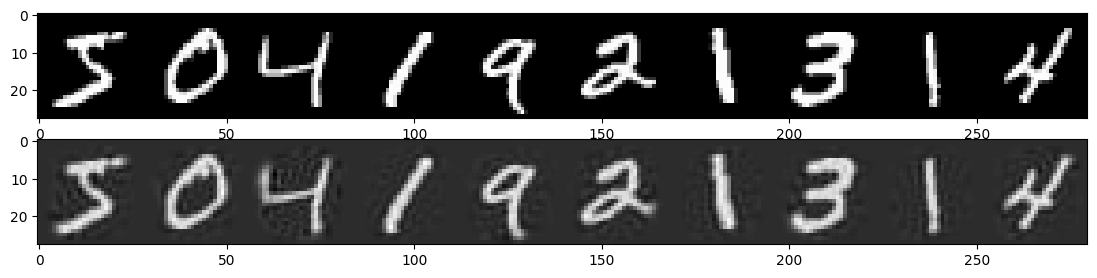

In [ ]:
num_images_to_show = 10 # 10개의 이미지만 출력
reconst_X, _= PCA_Avatar(images, 171) # pca구현함수 실행

origin_image = np.reshape(images[:num_images_to_show], (-1, 28, 28)) # 원본 이미지
reconst_image = np.reshape(reconst_X[:num_images_to_show], (-1, 28, 28)) # 복원 이미지
fig, ax = plt.subplots(2, 1, figsize=(num_images_to_show * 3, 3)) # 이미지 사이즈 조정

ax[0].imshow(np.concatenate(origin_image, -1), cmap="gray") # 원본 이미지 출력
ax[1].imshow(np.concatenate(reconst_image, -1), cmap="gray") # 복원 이미지 출력

행렬의 곱구현하기##중요부분

In [ ]:
def matrix_multiplication(X, PC):
    return X.dot(PC) # vector projection 

pca를 구하는 이유: https://specialscene.tistory.com/11

pca구하는 과정:https://big-dream-world.tistory.com/102



pca를 사용하는 이유: 차원의 저주에서를 해결      
다중 공산성해결:변수 간의 상관관계가 높을때 발생
----0-----0-- 1:
-0--------0-- 2:
-0--0-----0-- 분석값

x1가 0.5설명 
x2가 0.4설명 0.6 설명하지만 0.9설명한다고 착각함
겹치는부분(상관계수) 0.3라면? 
설명력을 작아져야하는데 작아지지않음

sklearn pca 구현하기

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=171)
images_=images[:4000] 
X2D= pca.fit_transform(images_)

In [ ]:
X2D.shape

(4000, 784)

정확도 96%까지 구하기

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d= np.argmax(cumsum>=0.96)+1
print("정확도96%인경우=",d)

정확도96%인경우= 171


784개까지 존재함

In [ ]:
print(pca.explained_variance_ratio_[0:41:1])

784개까지의 모든합

In [ ]:
print(cumsum[0:41:1])

In [ ]:
cumsum[149]
## 파이썬의 부동소수점 계산은 반올림을 합니다.

In [ ]:
cumsum.shape

In [ ]:
#pca = PCA(n_components=0.96)
#X_reduced = pca.fit_transform(images)

전체정확도의 0.96 그래프 그리기

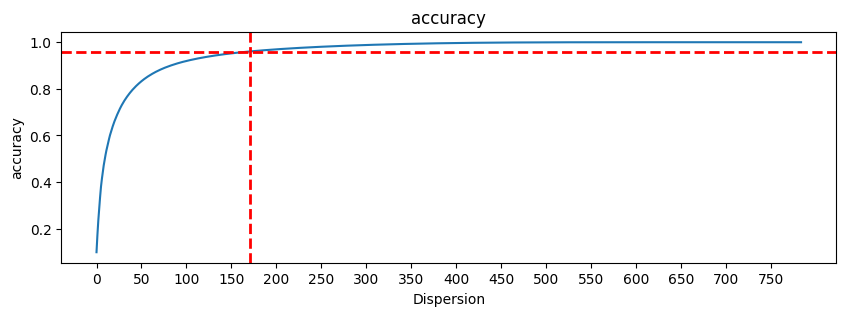

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(cumsum);
ax.axvline(d, linestyle='--', color='r', linewidth=2)
ax.axhline(0.96, linestyle='--', color='r', linewidth=2)
ax.xaxis.set_ticks(np.arange(0, 784, 50));
ax.set(xlabel='Dispersion', ylabel='accuracy', title='accuracy');

In [ ]:
print(pca.components_.shape)

주성분 171개로 만들기

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=171)
images_=images[:1000]
x_restor=pca.fit_transform(images_)
num_images_to_show=10
print("정규화된 행렬",x_restor.shape)
X_normalized, mean = normalize(x_restor)

print("주성분 ",pca.components_.shape)
def matrix_multiplication(X, PC):
    return X.dot(PC) # vector projection 

정규화된 행렬 (1000, 171)
주성분  (171, 784)


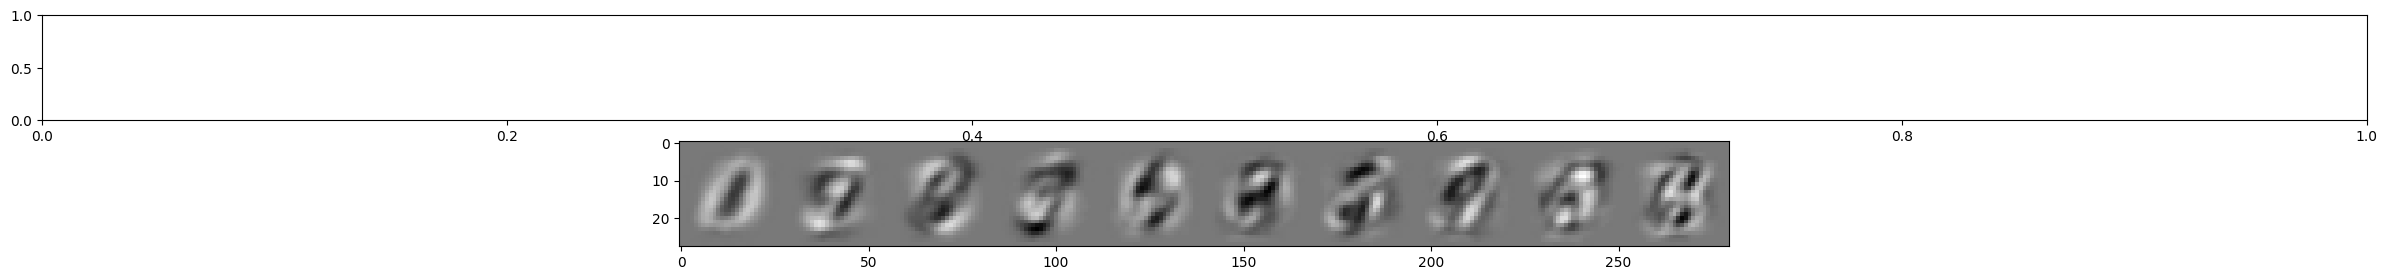

In [ ]:
reconst_image = np.reshape(pca.components_[:10], (-1, 28, 28)) ## 다른 이미지
fig, ax = plt.subplots(2, 1, figsize=(num_images_to_show * 3, 3))
ax[1].imshow(np.concatenate(reconst_image, -1), cmap="gray")


정규화한 그림과 주성분 그림을 행렬의 곱을 구함

주성분149개 주성분


sklearn에 내장된 코드

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=171) # 171개 주성분 적용
images_=images[:4000] # 4000개의 데이터 적용
x_restor=pca.fit_transform(images_) # PCA적용

print("pca를 적용한 결과",x_restor.shape) # pca를 적용한 행렬의 크기
X_normalized, mean = normalize(x_restor)
print("주성분 벡터",pca.components_.shape) # 주성분 벡터의 크기기
def matrix_multiplication(X, PC): 
    return X.dot(PC) # 행렬의 곱을 통해 데이터복원

pca를 적용한 결과 (4000, 171)
주성분 벡터 (171, 784)


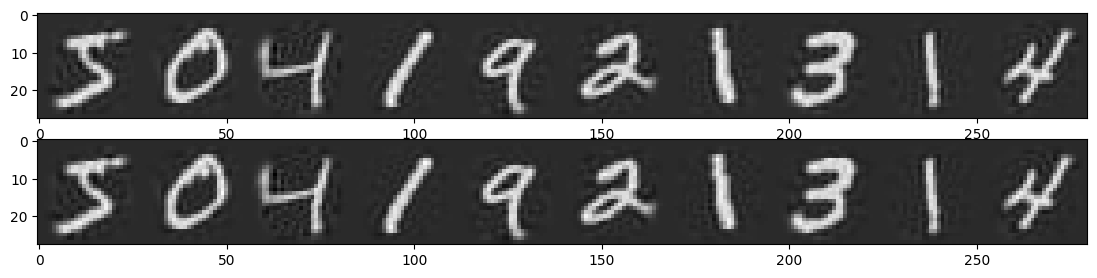

In [ ]:
reconst_X = matrix_multiplication(x_restor,pca.components_) # 이미지로 복원하기 
_,mean=normalize(images_)
reconst_X=reconst_X+mean
reconst_image_skl = np.reshape(reconst_X[:num_images_to_show], (-1, 28, 28)) # 사이킷런으로 복원한 이미지
fig, ax = plt.subplots(2, 1, figsize=(num_images_to_show * 3, 3))


ax[0].imshow(np.concatenate(reconst_image, -1), cmap="gray") # PCA구현함수로 복원한 이미지 출력

ax[1].imshow(np.concatenate(reconst_image_skl, -1), cmap="gray") # 사이킷런으로 복원한 이미지 출력


파이썬을 통해 구현한 코드

In [ ]:
# PCA 데이터 압축 시각화
count=np.array(10)
@interact(NUM_PC=(1, 784), continuous_update=False)
def plot_pca_images(NUM_PC=149):
    num_images_to_show = 10
    reconst_X, _, _, to = PCA_(images, NUM_PC)
    origin_image = np.reshape(images[:num_images_to_show], (-1, 28, 28)) ## 현재 이미지
    reconst_image = np.reshape(reconst_X[:num_images_to_show], (-1, 28, 28)) ## 다른 이미지
    fig, ax = plt.subplots(2, 1, figsize=(num_images_to_show * 3, 3))
    ax[1].imshow(np.concatenate(reconst_image, -1), cmap="gray")

NameError: ignored